In [1]:
!mkdir drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive

/content/drive


## Dataset

Add you kaggle.json to get the dataset from

In [ ]:
%cd MyDrive/FakeDet
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

[Errno 2] No such file or directory: 'MyDrive/FakeDet'
/content/drive/MyDrive/FakeDet


In [ ]:
import os, shutil
!kaggle datasets download -d birdy654/deep-voice-deepfake-voice-recognition

try:
    os.rename("./deep-voice-deepfake-voice-recognition.zip", "./dataset1.zip")
except Exception as e:
    print(f"Error renaming file: {str(e)}")

!unzip dataset1.zip
try:
    os.rename("./KAGGLE", "./dataset1")
    os.remove("./dataset1.zip")
    os.remove("./dataset1/DATASET-balanced.csv")
    shutil.rmtree("./DEMONSTRATION")

except Exception as e:
    print(f"Error: {str(e)}")

Archive:  dataset1.zip
  inflating: DEMONSTRATION/DEMONSTRATION/linus-original-DEMO.mp3  
  inflating: DEMONSTRATION/DEMONSTRATION/linus-to-musk-DEMO.mp3  
  inflating: KAGGLE/AUDIO/FAKE/Obama-to-Biden.wav  
  inflating: KAGGLE/AUDIO/FAKE/Obama-to-Trump.wav  
  inflating: KAGGLE/AUDIO/FAKE/biden-to-Obama.wav  
  inflating: KAGGLE/AUDIO/FAKE/biden-to-Trump.wav  
  inflating: KAGGLE/AUDIO/FAKE/biden-to-linus.wav  
  inflating: KAGGLE/AUDIO/FAKE/biden-to-margot.wav  
  inflating: KAGGLE/AUDIO/FAKE/biden-to-musk.wav  
  inflating: KAGGLE/AUDIO/FAKE/biden-to-ryan.wav  
  inflating: KAGGLE/AUDIO/FAKE/biden-to-taylor.wav  
  inflating: KAGGLE/AUDIO/FAKE/linus-to-biden.wav  
  inflating: KAGGLE/AUDIO/FAKE/linus-to-margot.wav  
  inflating: KAGGLE/AUDIO/FAKE/linus-to-musk.wav  
  inflating: KAGGLE/AUDIO/FAKE/linus-to-obama.wav  
  inflating: KAGGLE/AUDIO/FAKE/linus-to-ryan.wav  
  inflating: KAGGLE/AUDIO/FAKE/linus-to-taylor.wav  
  inflating: KAGGLE/AUDIO/FAKE/linus-to-trump.wav  
  inflating:

In [ ]:
import os
os.remove("./dataset1/DATASET-balanced.csv")

## Preprocessing


### Creating spectrogram

In [ ]:
!pip install librosa matplotlib

#### Test

<ipython-input-24-33eb8fc59452>:15: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


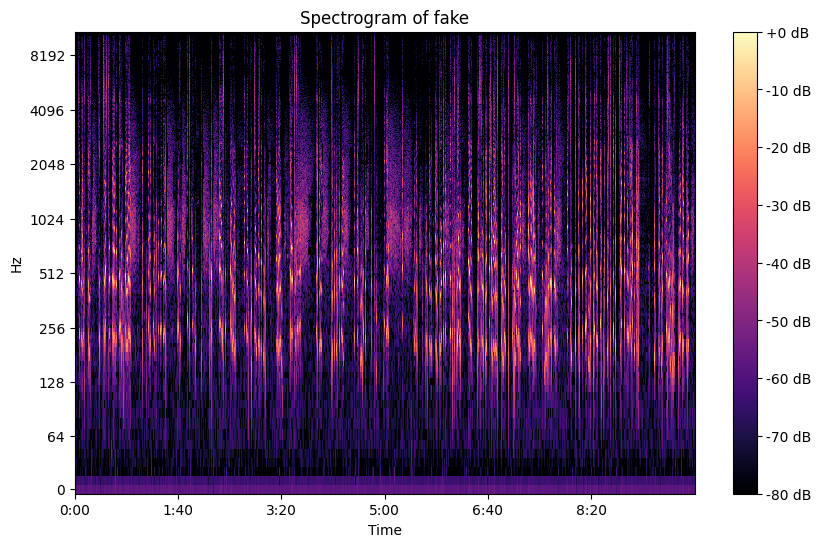

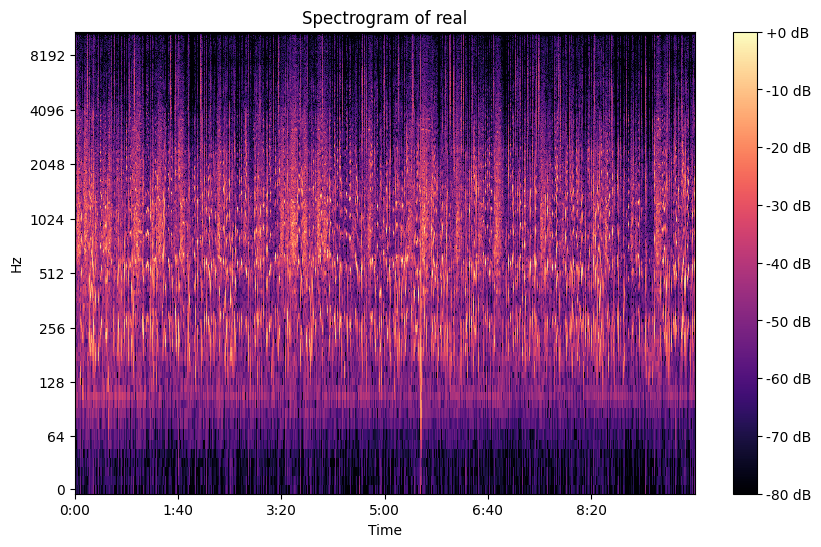

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_paths = [
    ["fake", "./dataset1/AUDIO/FAKE/Obama-to-Biden.wav"],
    ["real", "./dataset1/AUDIO/REAL/biden-original.wav"]
]
for audio_file in audio_paths:
  y, sr = librosa.load(audio_file[1])

  # Create a spectrogram
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

  # Display the spectrogram
  plt.figure(figsize=(10, 6))
  librosa.display.specshow(D, x_axis='time', y_axis='log')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Spectrogram of {audio_file[0]}')
  plt.show()


In [ ]:
!pip install opencv-python numpy matplotlib

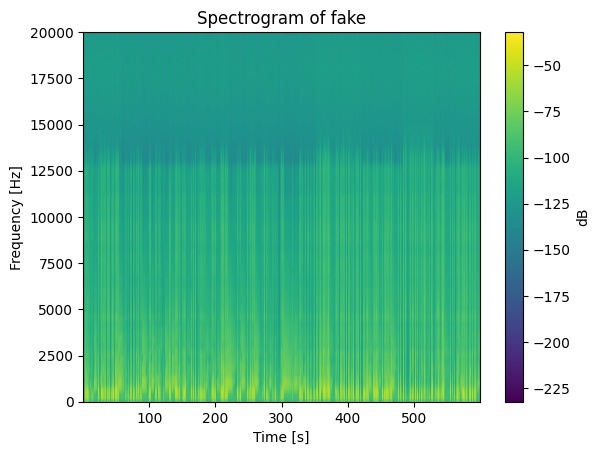

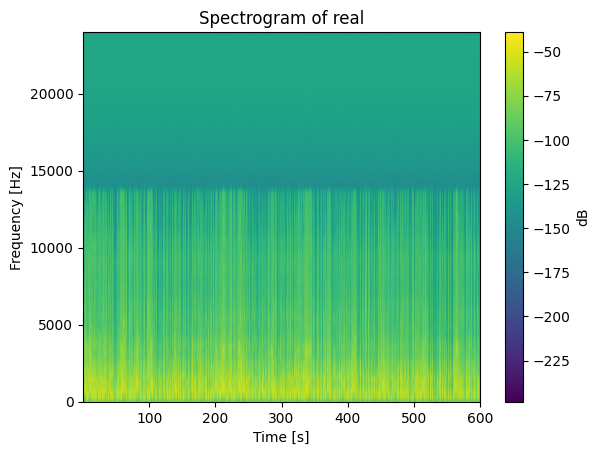

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt

audio_paths = [
    ["fake", "./dataset1/AUDIO/FAKE/Obama-to-Biden.wav"],
    ["real", "./dataset1/AUDIO/REAL/biden-original.wav"]
]

for audio_path in audio_paths:
    y, sr = librosa.load(audio_path[1], sr=None)
    Sxx, f, t, im = plt.specgram(y, Fs=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.title(f'Spectrogram of {audio_path[0]}')
    plt.show()


#### Main

In [ ]:
%cd /content/drive/MyDrive/FakeDet/dataset1
!mkdir SPECTRO

In [ ]:
import os, librosa
import librosa.display
import matplotlib.pyplot as plt

real_audio_folder = "/content/drive/MyDrive/FakeDet/dataset1/AUDIO/REAL"
fake_audio_folder = "/content/drive/MyDrive/FakeDet/dataset1/AUDIO/FAKE"

"""
Not optimistic for colab because of low RAM in free tier
"""

def generate_and_save_spectrogram(audio_path, output_folder):
    y, sr = librosa.load(audio_path, sr=None)
    Sxx = librosa.amplitude_to_db(librosa.stft(y))

    plt.figure(figsize=(6, 4))
    ax = plt.axes()
    librosa.display.specshow(Sxx, sr=sr, x_axis='time', y_axis='log', ax=ax, cmap='viridis')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    output_file_name = os.path.basename(audio_path)[:-4] + ".png"
    output_file_path = os.path.join(output_folder, output_file_name)
    plt.savefig(output_file_path, bbox_inches='tight', format='png', dpi=100)
    plt.close()

for file_name in os.listdir(real_audio_folder):
    audio_path = os.path.join(real_audio_folder, file_name)
    real_spectro_folder = real_audio_folder.replace("AUDIO", "SPECTRO")
    generate_and_save_spectrogram(audio_path, real_spectro_folder)

for file_name in os.listdir(fake_audio_folder):
    audio_path = os.path.join(fake_audio_folder, file_name)
    fake_spectro_folder = fake_audio_folder.replace("AUDIO", "SPECTRO")
    generate_and_save_spectrogram(audio_path, fake_spectro_folder)


<ipython-input-1-302ce68f206f>:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Sxx = librosa.amplitude_to_db(librosa.stft(y))
<ipython-input-1-302ce68f206f>:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Sxx = librosa.amplitude_to_db(librosa.stft(y))
<ipython-input-1-302ce68f206f>:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Sxx = librosa.amplitude_to_db(librosa.stft(y))
